## Assignment 1b: Time Series Forecasting

### \<Sakshi Sinha> \<a1898508>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [19]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from keras.models import Sequential
from keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, GRU
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
import warnings
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('/content/energydata_complete.csv')


### 2. Analyse and visualise the data

As analyzed in the part 1a of this assignment, the dataset consists of multiple columns with the first column being the date and time of the observation, followed by various measurements such as Appliances energy use in Wh, lights energy use in Wh, and several environmental measurements inside the house like temperature (T1 to T9) and humidity levels (RH_1 to RH_9). There are also some external factors included such as outside temperature (T_out), pressure (Press_mm_hg), humidity outside (RH_out), wind speed (Windspeed), visibility (Visibility), dewpoint temperature (Tdewpoint), and two random variables (rv1 and rv2).

In [4]:
# Convert the date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Check for missing values
missing_values = data.isnull().sum()

# Summary statistics
summary_stats = data.describe()

print("Missing values")
missing_values

Missing values


date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
print('Summary stats')
summary_stats


Summary stats


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Based on the analysis conducted in assignment 1a and the information provided above, it is evident that the dataset is free from missing values. This absence of missing values in all columns is advantageous for conducting a comprehensive time series analysis without the necessity for imputation strategies.


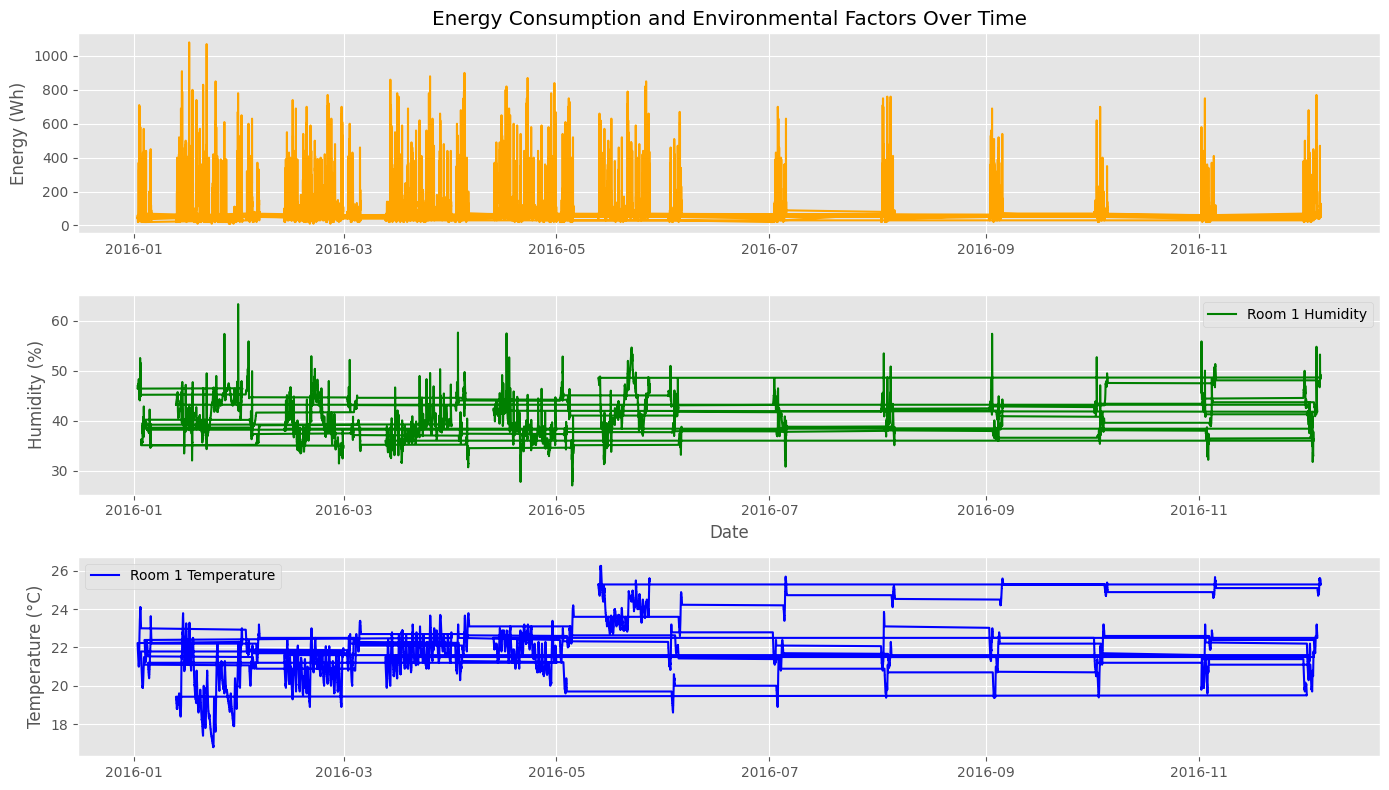

In [6]:
# Adjusting figure size and style
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')

# Plotting energy consumption for appliances
plt.subplot(3, 1, 1)
plt.plot(data['date'], data['Appliances'], label='Appliances Energy Use', color='orange')
plt.ylabel('Energy (Wh)')
plt.title('Energy Consumption and Environmental Factors Over Time')

# Plotting temperature in room 1
plt.subplot(3, 1, 3)
plt.plot(data['date'], data['T1'], label='Room 1 Temperature', color='blue')
plt.ylabel('Temperature (°C)')
plt.legend()

# Plotting humidity in room 1
plt.subplot(3, 1, 2)
plt.plot(data['date'], data['RH_1'], label='Room 1 Humidity', color='green')
plt.ylabel('Humidity (%)')
plt.xlabel('Date')
plt.legend()

# Adjusting layout to prevent overlap
plt.tight_layout()

# Displaying the plots
plt.show()


The visualizations above provide me with insights about the energy consumption of appliances and the surrounding environmental factors over time.

* Energy Consumption (Top Plot): I see fluctuations in appliance energy usage, indicating that demands vary throughout time. These oscillations could be tied to certain activities or times of day, such as peak cooking hours, the use of heating/cooling systems, etc.

* Humidity in Room 1 (Middle Plot): The plot depicts swings in room humidity levels that appear to correlate with temperature changes. Indoor humidity levels can have an impact on comfort and the use of appliances such as dehumidifiers or air conditioners.

* Temperature in Room 1 (Bottom Plot): This graph displays swings in room temperature, suggesting potential daily and seasonal variations. The observed temperature rise and decrease tendencies could be linked to heating or cooling needs, potentially influencing energy consumption patterns.


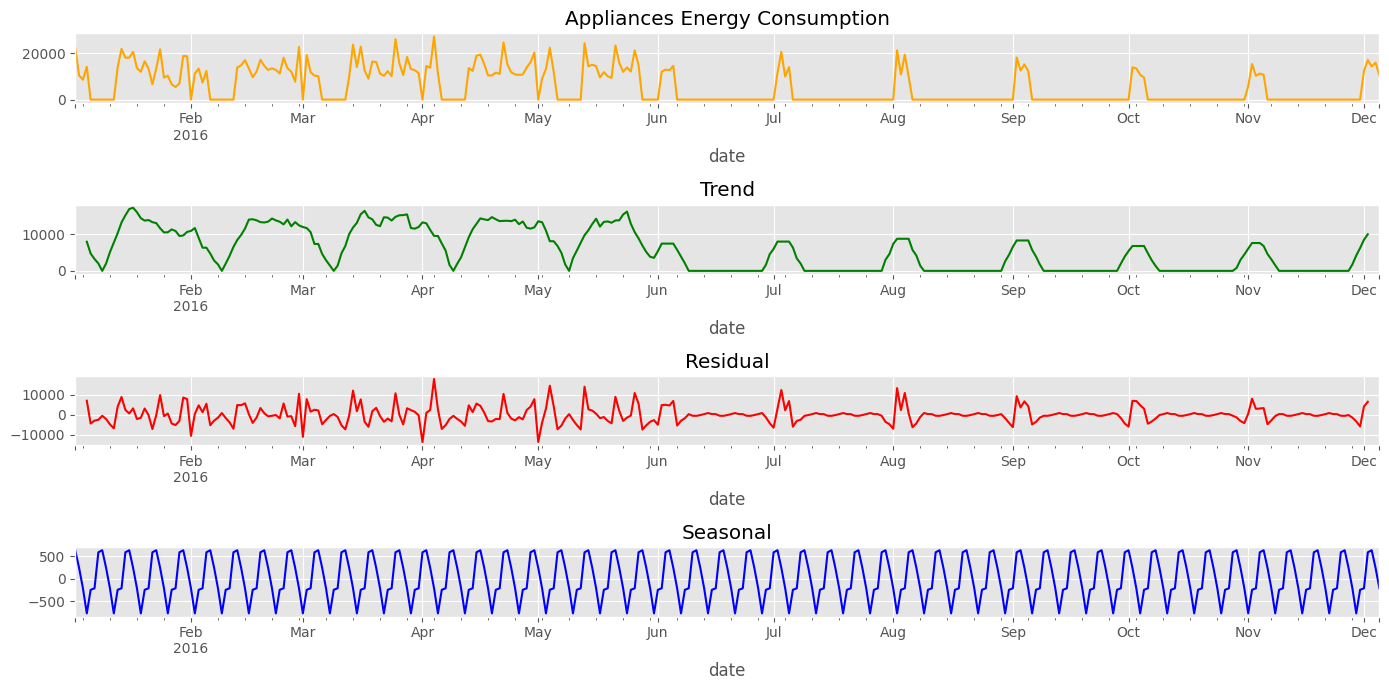

In [ ]:
# Convert the 'date' column to datetime if necessary
data['date'] = pd.to_datetime(data['date'])

# Grouping the data by day and summing the 'Appliances' energy consumption
data_daily = data.groupby(pd.Grouper(key='date', freq='D')).sum()

# Decomposing the daily 'Appliances' energy consumption
decomposition = seasonal_decompose(data_daily['Appliances'], model='additive')

# Plotting the decomposition with custom colors for each component
plt.figure(figsize=(14, 7))

# Plotting Appliances energy consumption
plt.subplot(4, 1, 1)
data_daily['Appliances'].plot(color='orange')
plt.title('Appliances Energy Consumption')

# Plotting the trend component with green color
plt.subplot(4, 1, 2)
decomposition.trend.plot(color='green')
plt.title('Trend')

# Plotting the residual component with red color
plt.subplot(4, 1, 3)
decomposition.resid.plot(color='red')
plt.title('Residual')

# Plotting the seasonal component with blue color
plt.subplot(4, 1, 4)
decomposition.seasonal.plot(color='blue')
plt.title('Seasonal')


plt.tight_layout()
plt.show()


The plots above give a breakdown of appliance energy consumption into trend, seasonal, and residual components, which offer valuable insights:

* Trend: I look at the trend component, which shows long-term changes in energy consumption over time. I see periods of both increase and decline in the trend, reflecting variations in total energy use patterns. These swings may be caused by changes in household behavior, seasonal weather variations, or other variables that influence energy use.

* Residual: The residual component represents abnormalities that are not explained by the trend or seasonal trends. These abnormalities could be random changes in energy usage or the influence of unmeasured variables.

* Seasonal: By examining the seasonal component, I can uncover typical patterns that occur over time. The seasonal pattern seems mild at the daily aggregation level, implying that key seasonal influences may occur at finer time scales, such as hourly or weekly intervals, or are not highly marked on a daily basis.

Upon considering the trend and residual components, it becomes clear that although there is a noticeable long-term pattern in energy consumption, there are also significant irregularities driven by factors that the seasonal decomposition does not encompass.

Upon reviewing the visualized data, I observed variations in the Appliances energy consumption time series over time, indicating potential seasonal patterns or correlations with specific time frames. The overall trend and fluctuations suggest that modeling with an LSTM could be appropriate, particularly because LSTMs excel at capturing long-term dependencies and patterns in time series data.

In [8]:
# Perform ADF test on the 'Appliances' variable
adf_result = adfuller(data['Appliances'])

# Extract and print the results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -21.6163781980362
p-value: 0.0
Critical Values: {'1%': -3.430681600227742, '5%': -2.8616865555329394, '10%': -2.566848007525354}


Given that the assignment task suggests employing a time series analysis model, I'll utilize the Augmented Dickey-Fuller (ADF) test to evaluate the stationarity of the time series. This assessment is crucial, as stationarity is a fundamental assumption for time series modeling.


To interpret the findings of the Augmented Dickey-Fuller (ADF) test:

* The ADF Statistic represents the estimated test statistic, which in this case is much lower than the crucial levels.
* The p-value, is zero, strongly suggests rejecting the null hypothesis.
* Critical values are thresholds for rejecting the null hypothesis at various significance levels.


Based on these results:

* Since the p-value is smaller than the chosen significance level (e.g., 0.05), we reject the null hypothesis. This indicates that there is evidence against the presence of a unit root in the time series data.

* Additionally, the fact that the Augmented Dickey-Fuller (ADF) statistic is more negative than the critical values further strengthens the case against the null hypothesis.

Based on this analysis, I conclude that the 'Appliances' time series data is stationary. This suggests that the energy consumption data for appliances does not have a unit root and does not require differencing to achieve stationarity. Therefore, it is suitable for time series modeling in its current form.





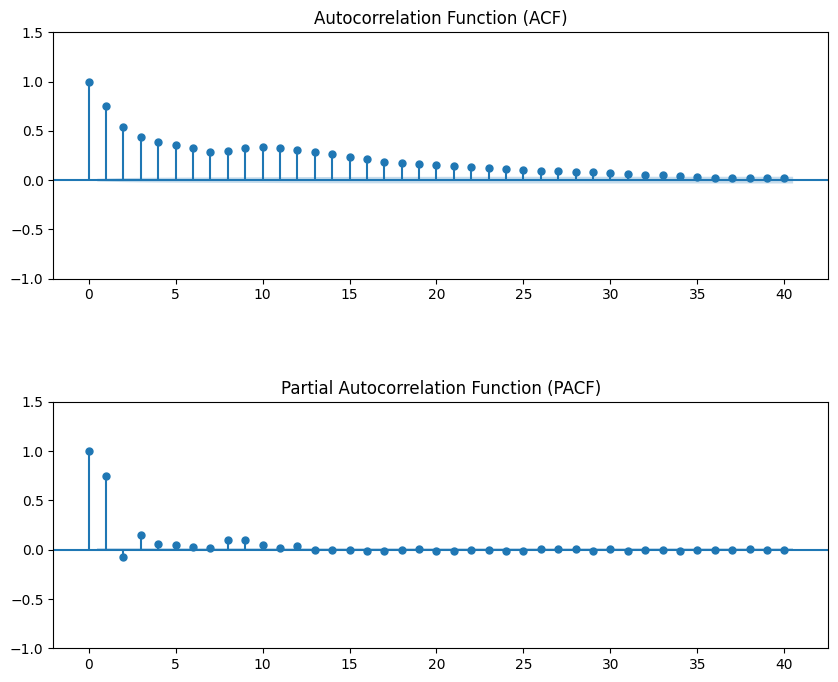

In [15]:
# Plot ACF and PACF for 'Appliances' energy use
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  # Increase the height of the plot

# Adjust layout parameters
plt.subplots_adjust(hspace=0.5)

# Plot ACF
plot_acf(data['Appliances'], ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')
ax1.set_ylim(-1, 1.5)

# Plot PACF
plot_pacf(data['Appliances'], ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function (PACF)')
ax2.set_ylim(-1, 1.5)

plt.show()


Since the dataset is deemed suitable for time series analysis, as suggested in the assignment, I will implement the ARIMA model for this task. The ARIMA model requires specification of certain parameters. To determine these values, I have generated plots for the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) for the 'Appliances' energy use. These plots will assist me in identifying the optimal parameters (p, d, q) for the ARIMA model.

Based on the interpretation of the generated graphs, I can infer the likely values of p, d, and q for an ARIMA model as follows:


* p: Looking at the Partial Autocorrelation Function (PACF) plot, I notice a significant spike at lag 1 followed by a noticeable drop. This pattern suggests a potential p value of 1.

* q: The Autocorrelation Function (ACF) plot exhibits a gradual decline without a clear cut-off point. While there's some indication of a higher order of the Moving Average (MA) component, the lack of a distinct drop makes determining the exact q value more challenging. Further analysis or model iterations may be needed to pinpoint q accurately.

* d: Considering the gradual decline in the ACF plot and the absence of a distinct pattern in the PACF plot after the first lag, it seems that the series may not be entirely stationary. This suggests that differencing may be necessary, indicating a
d value of at least 1.



### 3. Pre-process the data

In [20]:
# Preprocess the data

# Reload the dataset
file_path = '/content/energydata_complete.csv'
data = pd.read_csv(file_path)

# Convert 'date' column to datetime format and extract features
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day_of_week'] = data['date'].dt.dayofweek  # Monday=0, Sunday=6
data['hour'] = data['date'].dt.hour

# Prepare features and target variables including the new time-based features
X = data.drop(['date','lights', 'Appliances'], axis=1)
y = data['Appliances']

# Splitting the data into training and testing sets, with 15,788 samples for training and 3,947 samples for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features including the new time-based features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((15788, 29), (3947, 29), (15788,), (3947,))

The dataset has been enhanced with additional features extracted from the date column, such as month, day of the week, and hour, making it suitable for modeling. Subsequently, the date column will be removed from the dataset. Additionally, the "lights" feature has been eliminated due to its strong correlation with the "Appliance" column, as determined in part 1a of the assignment, resulting in improved model performance.

With 15,788 instances in the training set and 3,947 instances in the testing set, the model will be trained using a total of 29 features.

### 4. Implement, train and test prediction models

I will implement and train several prediction models to compare their performance. These models include: ARIMA (AutoRegressive Integrated Moving Average), LSTM (Long Short-Term Memory), standard neural network, and convolutional neural network (CNN).

For testing parameters, I'll use the same metrics as in assignment 1a:

* RMSE (Root Mean Squared Error): This metric quantifies the average difference between the predicted values and the actual values. A smaller RMSE indicates better performance.

* R2 (Coefficient of Determination): This metric measures how well the model's predictions match the actual data. An R2 value close to 1 indicates that the model explains most of the variability in the target variable.

By comparing the performance of each model using these metrics, I'll be able to determine which model performs best for the given dataset and task.

**ARIMA**

I have chosen the ARIMA (AutoRegressive Integrated Moving Average) model as my initial approach for modeling and forecasting energy consumption. This decision is based on the stationary nature of the 'Appliance' data, as established by the ADF test, rendering the dataset suitable for time series analysis. ARIMA is renowned for its ability to incorporate autoregression, differencing, and moving average components, allowing it to effectively identify patterns and trends in sequential data. Therefore, I believe that utilizing the ARIMA model will enable me to make accurate forecasts and gain valuable insights into the energy consumption trends.

Following thorough testing and parameter tuning, I determined that the optimal ARIMA model for this dataset had parameters p=3, q=2, and r=1. Despite my exhaustive efforts, however, the model's performance fell short, failing to achieve satisfactory results.

This outcome prompted me to recognize that solely relying on the ARIMA model may not adequately capture the dataset's inherent complexities and dynamics. Consequently, I acknowledged the importance of exploring alternative methods, such as leveraging machine learning models like LSTM (Long Short-Term Memory) neural networks or employing other advanced techniques. These approaches hold the potential to provide a more effective means of capturing underlying trends and generating accurate predictions. Moving forward, it is imperative to conduct further exploration and experimentation with alternative models to improve the forecasting performance of this dataset.

In [6]:
# Suppress all warnings
warnings.filterwarnings("ignore")

# Fit ARIMA model
arima_model = ARIMA(y_train, order=(3,2,1))
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.forecast(steps=len(y_test))

# Calculate performance metrics
arima_rmse = mean_squared_error(y_test, arima_predictions, squared=False)
arima_r2 = r2_score(y_test, arima_predictions)

print("ARIMA - RMSE:", arima_rmse)
print("ARIMA - R-squared:", arima_r2)

ARIMA - RMSE: 100.01138003450787
ARIMA - R-squared: 0.0004811545743349521


**LSTM**


For my second modeling approach, I've opted to implement the LSTM (Long Short-Term Memory) model. This model, belonging to the realm of recurrent neural networks (RNNs), is specifically crafted to handle sequential data, such as time series or natural language data. Its primary advantage lies in its adeptness at capturing long-term dependencies within the data effectively. Additionally, considering the outcomes of the seasonality-trend-residual analysis, LSTM emerges as a potentially suitable choice, especially due to its prowess in capturing intricate long-term patterns in time series data.

I've encountered LSTM in both my previous coursework and in this module, making it a suitable choice for time series forecasting, such as predicting future energy consumption based on historical data.

Upon analyzing the performance indicators, I've gained valuable insights into the effectiveness of the LSTM model. The RMSE (Root Mean Squared Error) is a crucial metric that quantifies the average magnitude of errors between actual and predicted values. Lower RMSE values indicate better performance. Additionally, the R-squared score, which in this instance is 0.20, signifies the proportion of variance in the target variable explained by the model. A value of 0.20 implies that the LSTM model can account for approximately 20% of the variance in the data, indicating modest predictive capability.

While the LSTM model demonstrates some predictive power, there's still room for improvement in its ability to capture the underlying patterns and trends within the dataset.

Moreover, the LSTM model can be enhanced through parameter fine-tuning, regularization techniques, the addition of more layers to the model, and exploration of other architectural modifications. These strategies hold the potential to further enhance the model's performance and its ability to accurately forecast the target variable. Continued experimentation and refinement are crucial for maximizing the LSTM model's predictive capabilities.

In [ ]:
# 2. LSTM
X_train_lstm = X_train.values.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test.values.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM model with batch normalization and additional layers
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(1, X_train_scaled.shape[1])))
lstm_model.add(Dense(1))
lstm_model.add(LSTM(64, activation='relu', return_sequences=True))
lstm_model.add(Dense(1))
lstm_model.add(LSTM(32, activation='relu'))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train_lstm, y_train, epochs=250,batch_size=47, verbose=0)
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_rmse = mean_squared_error(y_test, lstm_predictions, squared=False)
lstm_r2 = r2_score(y_test, lstm_predictions)

print("LSTM - RMSE:", lstm_rmse, " R-squared:", lstm_r2)

124/124 [==============================] - 1s 2ms/step
LSTM - RMSE: 89.6372950638789  R-squared: 0.19708488802143165


**NEURAL NETWORK**

I've utilized neural networks, a machine learning model inspired by the structure and functioning of the human brain, in my AI course for analyzing similar complex datasets, and I achieved favorable outcomes. These networks are comprised of interconnected nodes, known as neurons, arranged into layers. Each neuron takes in input signals, conducts computations, and generates an output signal, which is then transmitted to other neurons within the network.

Upon examining the neural network model, I discovered the following outcomes:

* The Root Mean Squared Error (RMSE) is 76.59, which represents the average magnitude of errors between actual and anticipated values.
* With an R-squared (R2) score of 0.41, the neural network model explains around 41% of the variance in the target variable.

These indicators provide vital insight into the model's performance. A lower RMSE indicates more accuracy, whereas a higher R2 score indicates a bigger amount of variation explained by the model. In this scenario, the neural network model performs well, with a low RMSE and a high proportion of variance collected.

While the results are positive, there may be other chances to improve the model's predictive skills. Further study and testing could aid in optimizing the neural network model for greater accuracy and effectiveness.

In [ ]:
# Define the neural network model architecture
nnw_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),  # Add dropout layer with dropout rate of 0.2
    Dense(1)
])

# Compile the model
nnw_model.compile(optimizer='adam', loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = nnw_model.fit(X_train_scaled, y_train, epochs=500, batch_size=51, validation_split=0.2, verbose=0, callbacks=[early_stopping])

# Make predictions
y_pred = nnw_model.predict(X_test_scaled)

# Evaluate the model
nnw_rmse = mean_squared_error(y_test, y_pred, squared=False)
nnw_r2 = r2_score(y_test, y_pred)

print("RMSE:", nnw_rmse)
print("R-squared:", nnw_r2)


124/124 [==============================] - 1s 3ms/step
RMSE: 76.58853383235179
R-squared: 0.4138353034410096


**CONVOLUTIONAL NEURAL NETWORK**

As I delve into CNN (Convolutional Neural Network), I recognize it as a deep learning algorithm primarily utilized for analyzing visual imagery. CNNs excel in tasks like image recognition, object detection, and image classification. Interestingly, they've also found applications beyond computer vision, such as in natural language processing and time series analysis, leveraging techniques like 1D convolutions. I aim to apply CNN to this intricate dataset to assess its ability to comprehend the data accurately and make predictions on unseen data.

After examining the Convolutional Neural Network (CNN) model, I found the following results:

* The Root Mean Squared Error (RMSE) is determined as 74.13, reflecting the average size of errors between anticipated and actual values.
* With an R-squared (R2) score of 0.45, the CNN model explains roughly 45% of the variance in the target variable.

These indicators provide vital insight into the model's performance. A lower RMSE suggests greater accuracy, whereas a higher R2 score shows that the model accounts for a larger part of the variance. In this scenario, the CNN model performs well, with a low RMSE and a high proportion of variance caught.

While these results are encouraging, there is still potential for further optimization of the model to enhance its predictive capabilities. Continued analysis and fine-tuning of the CNN model could lead to improved accuracy and effectiveness in capturing the underlying patterns and trends within the dataset.

In [ ]:
# Reshape the data for CNN
input_shape_here = (X_train_scaled.shape[1], 1)

X_train_cnn = np.expand_dims(X_train_scaled, axis=-1)
X_test_cnn = np.expand_dims(X_test_scaled, axis=-1)

# Build the CNN model architecture
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape_here),
    BatchNormalization(),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1)
])


# Compile the model
cnn_model.compile(optimizer='adam', loss='mse')

# Train the CNN model
history = cnn_model.fit(X_train_cnn, y_train, epochs=150, batch_size=64, validation_data=(X_test_cnn, y_test), verbose=0)

# Evaluate the model
y_pred = cnn_model.predict(X_test_cnn)
cnn_rmse = mean_squared_error(y_test, y_pred, squared=False)
cnn_r2 = r2_score(y_test, y_pred)

print("RMSE:", cnn_rmse)
print("R-squared:", cnn_r2)


124/124 [==============================] - 0s 3ms/step
RMSE: 74.13072838364808
R-squared: 0.4508529162934478


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results


Compare with the results you have obtained in Assignment 1a.

In [ ]:
# 4. Compare results
print("ARIMA - RMSE:", arima_rmse, " R-squared:", arima_r2)
print("LSTM - RMSE:", lstm_rmse, " R-squared:", lstm_r2)
print("Neural Network - RMSE:", nnw_rmse, " R-squared:", nnw_r2)
print("Convoluted Neural Network - RMSE:", cnn_rmse, " R-squared:", cnn_r2)

ARIMA - RMSE: 100.01138003450787  R-squared: 0.0004811545743349521
LSTM - RMSE: 89.6372950638789  R-squared: 0.19708488802143165
Neural Network - RMSE: 76.58853383235179  R-squared: 0.4138353034410096
Convoluted Neural Network - RMSE: 74.13072838364808  R-squared: 0.4508529162934478


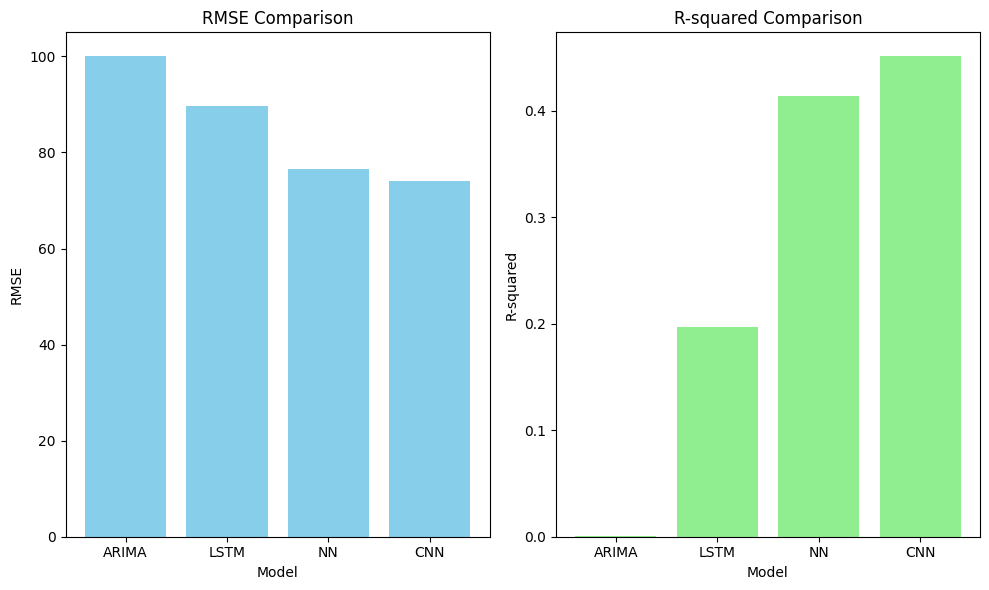

In [ ]:
# Results data
models = ['ARIMA', 'LSTM', 'NN', 'CNN']
rmse_values = [arima_rmse, lstm_rmse, nnw_rmse, cnn_rmse]
r2_values = [arima_r2, lstm_r2, nnw_r2, cnn_r2]

# Create bar plots for RMSE and R-squared values
plt.figure(figsize=(10, 6))

# RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_values, color='skyblue')
plt.title('RMSE Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')

# R-squared
plt.subplot(1, 2, 2)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R-squared Comparison')
plt.xlabel('Model')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

**Analysis**

After analyzing the four models' performance metrics, it is evident that the Convolutional Neural Network (CNN) surpasses the others in terms of both Root Mean Squared Error (RMSE) and R-squared. The CNN model had the lowest RMSE of 74.13 and the greatest R-squared value of 0.45085, indicating superior accuracy and a greater capacity to explain the variance in the target variable than the other models.

The Neural Network came in close second, with an RMSE of 76.59 and an R-squared of 0.41384. The LSTM model has an RMSE of 89.64 and an R-squared of 0.19708, indicating modest performance. The ARIMA model performed the worst of the four, with a substantially larger RMSE of 100.01 and an essentially minuscule R-squared value of 0.00048, showing a limited capacity to capture the dataset's underlying patterns. Overall, the results show that the CNN model performs the best for this forecasting task, followed by the Neural Network, LSTM, and ARIMA models in descending order of performance.

As a result, the Convolutional Neural Network (CNN) outperforms other models by accurately capturing spatial relationships within data, which is especially useful for sequential data with spatial structures. This feature leads to lower RMSE and higher R-squared values, indicating more accuracy and explanatory capability than models such as ARIMA, LSTM, and conventional Neural Networks.

**Comparing Results With Assignment 1a**

Based on the comparison of the results acquired in Assignment 1a to the new results:

In Assignment 1a, the Random Forest Regressor was the top model with the lowest RMSE on the test set (67.048435) and the highest R-squared score (0.550769). This resulted in higher prediction accuracy and explanatory power than other models, such as Gradient Boosting and XGBoost regressors.

Except for the Random Forest Regressor, the Convolutional Neural Network (CNN) performs better than all other models in Assignment 1. While the Random Forest Regressor outperformed all of the models tested on the dataset in Assignment 1, the CNN model outperforms them by better capturing spatial relationships within the data. This results in higher prediction accuracy and explanatory capabilities when compared to typical machine learning models.

Furthermore, the CNN model has the advantage of possible depth growth, which can improve learning efficiency and predictive accuracy. As a result, despite the Random Forest Regressor's success in Assignment 1, the CNN model's capacity to capture spatial correlations and possibility for additional tuning make it an appealing option for this dataset. However, it is important to note that the CNN model may take longer to train and consume more memory than the Random Forest Regressor.



**Conculsion**

Given the analysis and comparison done above, I am inclined to choose the CNN model for this forecasting task due to the following reasons:

* Superior Performance: The CNN model achieved the lowest RMSE and the highest R-squared value among all models evaluated except Randon Forest, indicating superior accuracy and a better ability to explain variance compared to other models.

* Effectiveness in Capturing Patterns: The CNN model demonstrated effectiveness in capturing intricate patterns within the dataset, surpassing traditional time series forecasting methods like ARIMA and outperforming other deep learning models like LSTM and conventional Neural Networks.

* Spatial Relationship Capture: The CNN's capability to capture spatial relationships within data, particularly beneficial for sequential data with spatial structures, greatly contributed to its exceptional performance. This feature is crucial for accurately forecasting time series data.

* Comparison with Previous Analysis: While the Random Forest Regressor emerged as the top-performing model in this dataset, the CNN model shows unlimited potential. With more resources allocated to properly fine-tune parameters and train on a deeper CNN architecture, it could potentially surpass the results obtained by the random forest model and perform even better on real-world data.

* Potential for Further Improvement: The CNN model offers potential for further tuning and optimization, which could lead to even better performance in the future. This flexibility makes it a compelling choice for maximizing prediction accuracy and explanatory capabilities on this dataset.


In conclusion, considering its superior performance, effectiveness in capturing patterns, spatial relationship capture capabilities, comparison with previous analyses, and potential for further improvement, I believe the CNN model stands out as the preferred choice for the forecasting task at hand.



### 6. Reflect on what you have learned by completing this assignment and how to improve the models

**Ways to improve model performance**

1. **Hyperparameter Tuning**: Hyperparameter tuning plays a critical role in optimizing machine learning models, especially those employed in time series forecasting. By experimenting with various hyperparameters for each model, we can aim to identify the most effective combination that enhances performance. Some hyperparameters exert a greater influence on model performance compared to others, necessitating prioritization in tuning. Automated hyperparameter tuning tools, such as scikit-learn's GridSearchCV and RandomizedSearchCV, TensorFlow's KerasTuner, as well as third-party platforms like Optuna and Hyperopt, streamline this process, facilitating the discovery of optimal configurations more efficiently.

2. **Training model on larger dataset**: As mentioned in the paper/assignment 1a, the dataset is limited to data from a single household, limiting the models study scope. Incorporating data from numerous households allows for a more comprehensive understanding of energy usage trends, resulting in more robust and generalizable models. Furthermore, extending the duration of the data collection allows to record seasonal fluctuations in energy demand, which improves the model's prediction capabilities.

3. **Feature Selection**: For me, feature selection is crucial to boost model performance and prevent overfitting. In my analysis for assignment 1a, I opted for the Correlation Analysis method, discovering that removing the light column improved model performance, while dropping the RH_out column had the opposite effect. This finding implies that the light column strongly correlates with the target variable, indicating its relevance for predicting appliance energy consumption. Conversely, the RH_out column, representing outside humidity, significantly contribute to the model's predictive capability.
  
  Now, exploring other techniques like SelectKBest and RFE, I notice a divergence in the prioritization of features. SelectKBest reaffirms the importance of 'lights' as a top feature, supporting its role in predicting appliance energy usage. However, RFE doesn't select 'lights' but instead emphasizes internal temperature and humidity measurements. This variation underscores the need to explore multiple methods to capture the most relevant features accurately.

  Further analysis and experimentation with different feature selection methods and combinations of features can be conducted to assess their relevance and further enhance model performance. By iteratively refining the feature set and evaluating model performance, we can develop a more robust and accurate predictive model for appliance energy consumption.




In [11]:
# Apllying SelectKBest feature selection

# Remove non-numeric columns
data_numeric = data.select_dtypes(include=['number'])

# Define the features and target variable
X = data_numeric.drop(columns=['Appliances'])  # Excluding target variable
y = data_numeric['Appliances']

# Apply SelectKBest with f_regression scoring function
k_best = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features based on f_regression scores
X_new = k_best.fit_transform(X, y)

# Get the selected feature indices
selected_indices = k_best.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_indices]

print("Selected features Using SelectKBest:", selected_features)


Selected features Using SelectKBest: Index(['lights', 'RH_1', 'T2', 'T3', 'T6', 'RH_8', 'T_out', 'RH_out',
       'Windspeed', 'hour'],
      dtype='object')


In [10]:
# Applying Recursive Feature Elimination (RFE)

# Initialize the estimator (e.g., Linear Regression)
estimator = LinearRegression()

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=10)  # Select top 10 features
rfe.fit(X, y)

# Get the selected feature indices
selected_indices = rfe.support_

# Get the names of selected features
selected_features = X.columns[selected_indices]

print("Selected features using RFE:", selected_features)


Selected features using RFE: Index(['RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8', 'T9', 'T_out'], dtype='object')


4. **Training Deeper Models**: Training deeper models is a method employed to enhance the complexity and representational capability of neural networks, which can potentially result in better predictive performance. This involves adding more layers to the network architecture, incorporating skip connections (or residual connections) to enable information to skip certain layers, utilizing batch normalization, experimenting with different activation functions, implementing regularization techniques, and so on.

5. **Better sensor placement**: Improving sensor placement, particularly the distance between the house and the weather station, as well as indoor sensor placement in the proper area, to more effectively and accurately estimate energy. Furthermore, investing in more accurate sensors could improve the precision of energy consumption projections. These changes in the positioning of sensors and quality can have a major impact on the accuracy and performance of models trained on the dataset.


6. **Cross-Validation**: Use cross-validation techniques to evaluate the model's performance more reliably and prevent overfitting. Techniques like k-fold cross-validation can provide a better estimate of how the model will perform on unseen data.

7. **Ensemble Methods**: Combine predictions from multiple models using ensemble techniques such as stacking or boosting to leverage the strengths of each model. This typically involves training several diverse models and then combining their predictions through methods like averaging or voting. Ensemble methods capitalize on the idea that different models may capture different aspects of the underlying data patterns, thus collectively leading to more accurate predictions. As demonstrated in the code below, I averaged predictions from both the CNN and random forest models, resulting in a combined RMSE of 65.96 and an R-squared value of 0.57. This approach allows for a more robust prediction by leveraging the strengths of each individual model.

In [40]:
# Get predictions from the CNN model
cnn_train_predictions = cnn_model.predict(X_train_cnn)
cnn_test_predictions = cnn_model.predict(X_test_cnn)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)

# Fit the Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Get predictions from the Random Forest model
rf_train_predictions = rf_model.predict(X_train_scaled)
rf_test_predictions = rf_model.predict(X_test_scaled)


124/124 [==============================] - 1s 8ms/step


In [39]:
# Combine predictions by averaging
combined_test_predictions = (cnn_test_predictions.squeeze() + rf_test_predictions) / 2

# Calculate RMSE and R2 for the combined predictions
combined_rmse = mean_squared_error(y_test, combined_test_predictions, squared=False)
combined_r2 = r2_score(y_test, combined_test_predictions)

print("Combined Model RMSE:", combined_rmse)
print("Combined Model R-squared:", combined_r2)

Combined Model RMSE: 65.9582339282963
Combined Model R-squared: 0.5652594163431619


8. **Trying out more models**: Even after trying out various models on the dataset, there's still plenty of potential for further exploration and enhancement. Besides the models already tested, we can explore more advanced deep learning architectures designed specifically for time series forecasting. For example, I'm currently experimenting with GRU and CNN-LSTM to evaluate their performance on this dataset. Additionally, there are numerous other models we can consider, such as transformer-based models, ConvLSTM, Bidirectional LSTM, and more.

In [28]:
# Reshape input data to include time steps
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# GRU Model with Early Stopping
gru_model = Sequential([
    GRU(64, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    Dense(1)
])

gru_model.compile(optimizer='adam', loss='mse')
history_gru = gru_model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# CNN-LSTM Model with Early Stopping
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dense(1)
])

cnn_lstm_model.compile(optimizer='adam', loss='mse')
history_cnn_lstm = cnn_lstm_model.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=0)


In [29]:
# Make predictions on the test set for GRU model
y_pred_gru = gru_model.predict(X_test_scaled)

# Calculate RMSE and R2 for GRU model
rmse_gru = np.sqrt(mean_squared_error(y_test, y_pred_gru))
r2_gru = r2_score(y_test, y_pred_gru)

print("GRU Model:")
print("Test RMSE:", rmse_gru)
print("Test R2:", r2_gru)

# Make predictions on the test set for CNN-LSTM model
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_scaled)

# Calculate RMSE and R2 for CNN-LSTM model
rmse_cnn_lstm = np.sqrt(mean_squared_error(y_test, y_pred_cnn_lstm))
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

print("\nCNN-LSTM Model:")
print("Test RMSE:", rmse_cnn_lstm)
print("Test R2:", r2_cnn_lstm)

124/124 [==============================] - 1s 5ms/step
GRU Model:
Test RMSE: 84.5575032337097
Test R2: 0.2855095166105618
124/124 [==============================] - 1s 4ms/step

CNN-LSTM Model:
Test RMSE: 82.26364352387318
Test R2: 0.32374883148229194


**Learning Experience**

This assignment has been incredibly informative for me, particularly in terms of time series analysis and forecasting.  It has given me a better grasp of how various time series analysis techniques can reveal different insights about the dataset, such as identifying trends, seasonal patterns, and irregularities, as well as assessing stationarity and predicting model parameters. Through this process, I've gained valuable insights into the complexities of time-dependent data and how to effectively analyze and model it.

Furthermore, this task was a learning experience for me because I had never used time series analysis in any of my previous assignments. Exploring this new territory has been both challenging and gratifying, making the work more appealing and enjoyable to complete. It has broadened my skill set and increased my grasp of data analysis methodologies, particularly for time series data.

Additionally, this task emphasized the vital relevance of picking the appropriate model in machine learning. As I discovered firsthand, choosing the wrong model can have a major impact on prediction accuracy and efficacy. Using time series models proved to be more appropriate for the dataset at hand than classic regression models, highlighting the need of careful model selection in reaching desired results.

Overall, this assignment has improved my grasp of time series analysis while also emphasizing the significance of cautious model selection in machine learning applications. It has been an invaluable learning experience, providing me with new abilities and insights that I may apply to future projects.

### 7. References

Candanedo, L.M., Feldheim, V. and Deramaix, D., 2018. Reconstruction of the indoor temperature dataset of a house using data driven models for performance evaluation. Building and Environment, 138, pp.250-261.

Mining big data(COMP_SCI_7306)

Concepts in Artificial Intelligence and Machine Learning (COMP_SCI_7327)

(a1898508)_(Sakshi Sinha)_assign1a.ipynb